<a href="https://colab.research.google.com/github/AyumuMiota/mysite/blob/master/%F0%9F%86%95%E3%80%90%E5%B9%B4%E5%8F%8E%E4%BA%88%E6%B8%AC%E3%80%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データのダウンロード

In [ ]:
!unzip "/content/signate_kokusei.zip"

Archive:  /content/signate_kokusei.zip
   creating: signate 国勢調査/
  inflating: signate 国勢調査/train.tsv  
  inflating: __MACOSX/signate 国勢調査/._train.tsv  
  inflating: signate 国勢調査/test.tsv  
  inflating: __MACOSX/signate 国勢調査/._test.tsv  
  inflating: signate 国勢調査/sample_submit.csv  
  inflating: __MACOSX/signate 国勢調査/._sample_submit.csv  


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tsvファイルの読み込み

In [ ]:
train = pd.read_table("/content/signate_kokusei/train.tsv", index_col=0)
test = pd.read_table("/content/signate_kokusei/test.tsv", index_col=0)

# データの形を知る

In [ ]:
print(train.shape)
train.head()

(16280, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
id,,,,,,,,,,,,,,,
5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K


In [ ]:
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Y                 0
dtype: int64

In [ ]:
print(test.shape)
test.head()

(16281, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
id,,,,,,,,,,,,,,
0,30,Private,107793,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,56,United-States
1,39,Private,76767,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,60,United-States
2,28,Self-emp-not-inc,149324,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,7,United-States
3,50,State-gov,276241,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
4,53,Private,177647,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,40,United-States


In [ ]:
test.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.559487,1.895814e+05,10.071801,1024.243351,86.532338,40.464898
std,13.609075,1.062084e+05,2.574576,7086.407756,400.666956,12.383353
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.776330e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.366870e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

# 欠損値の補完

In [ ]:
# 文字型の欠損値確認

print("workclass"), print(x_train["workclass"].unique())
print("education"), print(x_train["education"].unique())
print("marital-status"), print(x_train["marital-status"].unique())
print("occupation"), print(x_train["occupation"].unique())
print("relationship"), print(x_train["relationship"].unique())
print("race"), print(x_train["race"].unique())
print("sex"), print(x_train["sex"].unique())
print("native-country"), print(x_train["native-country"].unique())

workclass


NameError: ignored

? を 最頻値で埋める

In [ ]:
x_train["workclass"].value_counts()

Private             11281
Self-emp-not-inc     1281
Local-gov            1033
?                     950
State-gov             653
Self-emp-inc          560
Federal-gov           512
Without-pay             6
Never-worked            4
Name: workclass, dtype: int64

In [ ]:
x_train["occupation"].value_counts()

Prof-specialty       2055
Craft-repair         2051
Exec-managerial      2034
Adm-clerical         1954
Sales                1831
Other-service        1634
Machine-op-inspct     965
?                     954
Transport-moving      759
Handlers-cleaners     673
Farming-fishing       504
Tech-support          455
Protective-serv       333
Priv-house-serv        75
Armed-Forces            3
Name: occupation, dtype: int64

In [ ]:
x_train["native-country"].value_counts()

United-States                 14556
Mexico                          332
?                               291
Philippines                     108
Germany                          68
Canada                           60
Puerto-Rico                      59
India                            57
Cuba                             51
El-Salvador                      49
South                            42
Jamaica                          40
China                            38
Columbia                         35
Japan                            35
Dominican-Republic               34
Italy                            34
England                          32
Vietnam                          31
Poland                           30
Taiwan                           30
Guatemala                        25
Nicaragua                        23
Iran                             21
Ecuador                          19
Peru                             18
Haiti                            18
Portugal                    

In [ ]:
x_train["workclass"] = x_train["workclass"].replace("?", "Private")
x_train["occupation"] = x_train["occupation"].replace("?", "Prof-specialty")
x_train["native-country"] = x_train["native-country"].replace("?", "United-States")

test["workclass"] = test["workclass"].replace("?", "Private")
test["occupation"] = test["occupation"].replace("?", "Prof-specialty")
test["native-country"] = test["native-country"].replace("?", "United-States")

# ?を欠損値として扱う

In [ ]:
train.replace('?', np.nan, inplace = True)

In [ ]:
test.replace('?', np.nan, inplace = True)

In [ ]:
train.isnull().sum()

age                            0
workclass                      0
fnlwgt                         0
education                      0
education-num                  0
marital-status                 0
occupation                     0
relationship                   0
race                           0
sex                            0
capital-gain                   0
capital-loss                   0
hours-per-week                 0
native-country                 0
Y                              0
race_country                   0
race_education                 0
ed_occupation                  0
sex-occupation                 0
race-occupation                0
race-workclass                 0
workclass-occupation           0
workclass_native-country       0
marital-status_occupation      0
marital-status_workclass       0
marital-status_relationship    0
ed-num_capital-gain            0
dtype: int64

# データの可視化

age(年齢), workclass(職業クラス), fnlwgt, education(教育), education-num(教育年数), marital-status(配偶者の有無), occupation(職業), relationship(関係), race(人種), sex(性別), capital-gain(キャピタルゲイン), capital-loss(キャピタルロス), hours-per-week(１週間あたりの仕事の時間??), native-country(母国), Y(年収) 

In [ ]:
train.head().T

id,5,10,11,13,14
age,90,46,37,45,40
workclass,Private,Private,Private,Local-gov,Private
fnlwgt,313986,74895,67433,144940,272960
education,11th,Assoc-acdm,HS-grad,Masters,Assoc-acdm
education-num,7,12,9,14,12
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Divorced,Married-civ-spouse
occupation,Handlers-cleaners,Craft-repair,Adm-clerical,Prof-specialty,Tech-support
relationship,Own-child,Husband,Wife,Unmarried,Husband
race,White,White,White,Black,White
sex,Male,Male,Female,Female,Male


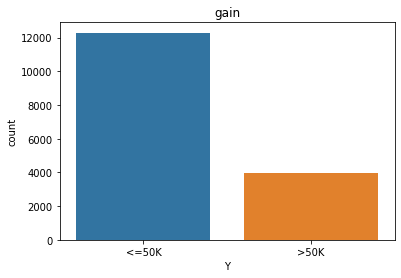

<=50K    12288
>50K      3992
Name: Y, dtype: int64

In [ ]:
# countplot
sns.countplot(x="Y",data=train)
plt.title("gain")
plt.xticks([0,1],["<=50K",">50K"])
plt.show();

display(train["Y"].value_counts())

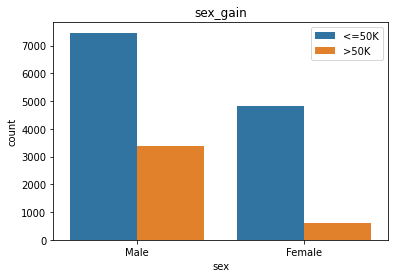

Y,<=50K,>50K
sex,,
Female,4827,617
Male,7461,3375


In [ ]:
# クロス集計

sns.countplot(x="sex",hue="Y",data=train)
plt.title("sex_gain")
plt.legend(["<=50K",">50K"])
plt.show()

# sexとYをクロス集計する

display(pd.crosstab(train["sex"], train["Y"]))

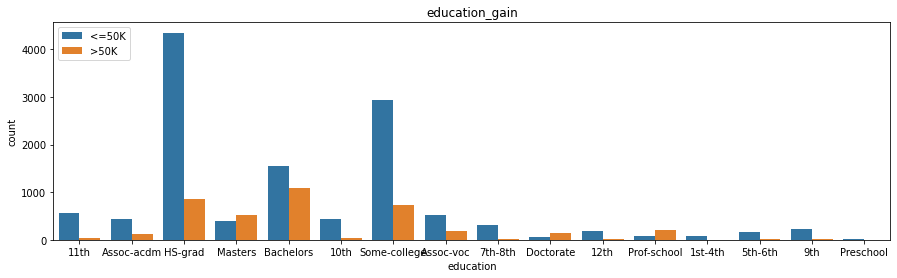

Y,<=50K,>50K
education,,
10th,435,28
11th,569,30
12th,179,21
1st-4th,80,1
5th-6th,157,10
7th-8th,315,21
9th,227,8
Assoc-acdm,434,130
Assoc-voc,520,194


In [ ]:
plt.figure(figsize=(15,4))  # 図の大きさ指定
sns.countplot(x="education",hue="Y",data=train)
plt.title("education_gain")
plt.legend(["<=50K",">50K"])
plt.show()

# educationとYをクロス集計する

display(pd.crosstab(train["education"], train["Y"]))

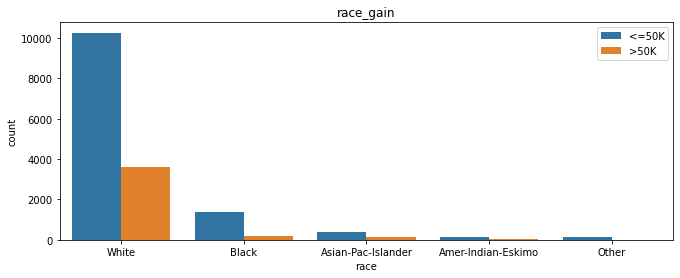

Y,<=50K,>50K
race,,
Amer-Indian-Eskimo,123,18
Asian-Pac-Islander,375,154
Black,1385,199
Other,135,10
White,10270,3611


In [ ]:
plt.figure(figsize=(11,4))  # 図の大きさ指定
sns.countplot(x="race",hue="Y",data=train)
plt.title("race_gain")
plt.legend(["<=50K",">50K"])
plt.show()

# raceとYをクロス集計する

display(pd.crosstab(train["race"], train["Y"]))

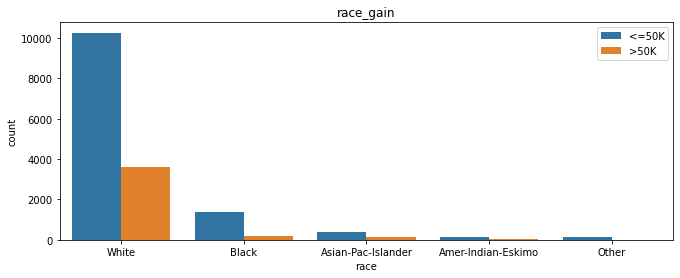

Y,<=50K,>50K
race,,
Amer-Indian-Eskimo,123,18
Asian-Pac-Islander,375,154
Black,1385,199
Other,135,10
White,10270,3611


In [ ]:
plt.figure(figsize=(11,4))  # 図の大きさ指定
sns.countplot(x="race",hue="Y",data=train)
plt.title("race_gain")
plt.legend(["<=50K",">50K"])
plt.show()

# raceとYをクロス集計する

display(pd.crosstab(train["race"], train["Y"]))

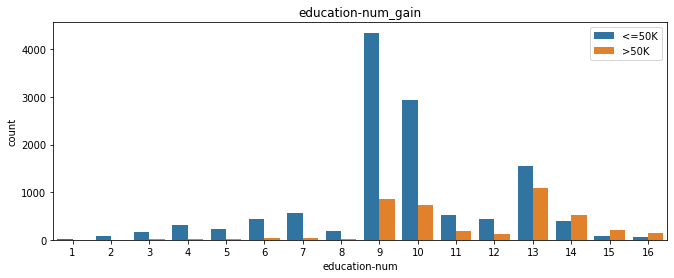

In [ ]:
plt.figure(figsize=(11,4))  # 図の大きさ指定
sns.countplot(x="education-num",hue="Y",data=train)
plt.title("education-num_gain")
plt.legend(["<=50K",">50K"])
plt.show()

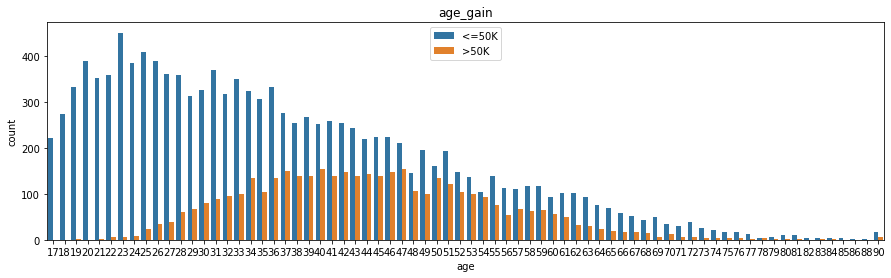

In [ ]:
plt.figure(figsize=(15,4))  # 図の大きさ指定
sns.countplot(x="age",hue="Y",data=train)
plt.title("age_gain")
plt.legend(["<=50K",">50K"])
plt.show()


# 外れ値の除去

In [ ]:
train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16280.000000,1.628000e+04,16280.000000,16280.000000,16280.000000,16280.000000
mean,38.603808,1.899753e+05,10.089558,1131.057617,88.075369,40.410012
std,13.672102,1.048903e+05,2.570911,7672.406043,405.251482,12.311716
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.186912e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.789955e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376340e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
train["hours-per-week"]

id
5        40
10       55
11       40
13       40
14       42
         ..
32552    40
32553    60
32554    40
32555    15
32557    20
Name: hours-per-week, Length: 16280, dtype: int64

# 特徴量エンジニアリング

# グラフを見る

決定木ベース … ラベルエンコーディング

線形結合 … onehot

年代別カラムの作成 → 年代ごとで有意な差 → age使えばOK

In [ ]:
import math
train['generation'] = train['age'].apply(lambda x: math.floor(x/10)*10)
test['generation'] = test['age'].apply(lambda x: math.floor(x/10)*10)

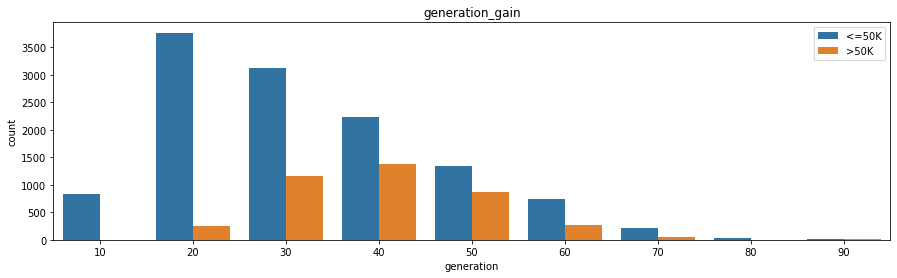

In [ ]:
plt.figure(figsize=(15,4))  # 図の大きさ指定
sns.countplot(x="generation",hue="Y",data=train)
plt.title("generation_gain")
plt.legend(["<=50K",">50K"])
plt.show()

教育と職業

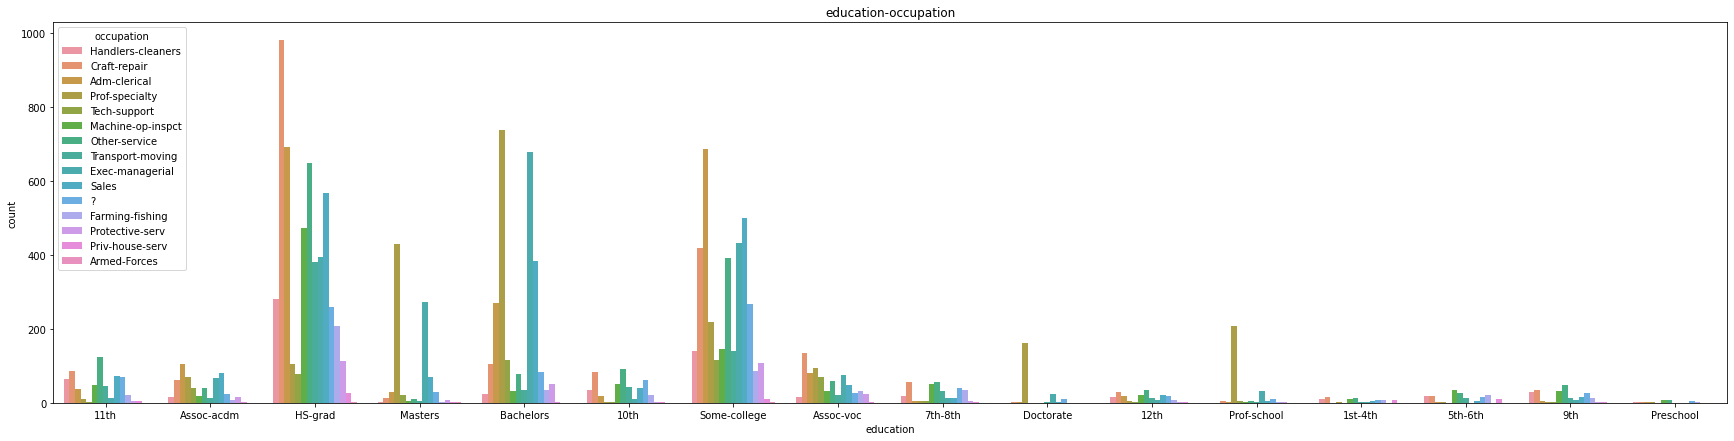

In [ ]:
# educationやeducation-numによってoccupationは異なるようだ

plt.figure(figsize=(30,7))  # 図の大きさ指定
sns.countplot(x="education",hue="occupation",data=train)
plt.title("education-occupation")

plt.show()

性別と職業

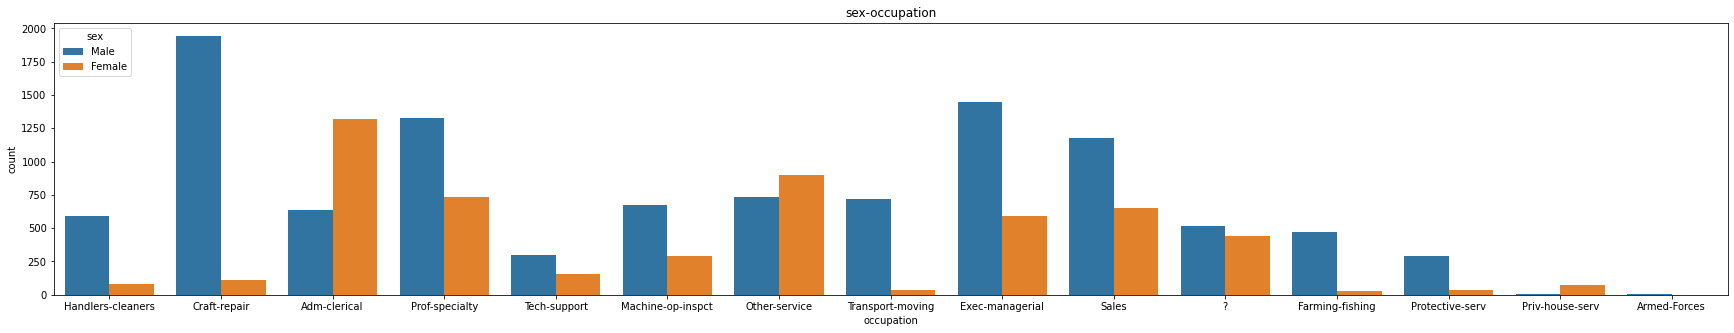

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="occupation",hue="sex",data=train)
plt.title("sex-occupation")

plt.show()

人種と職業 → あまり関係ない？？

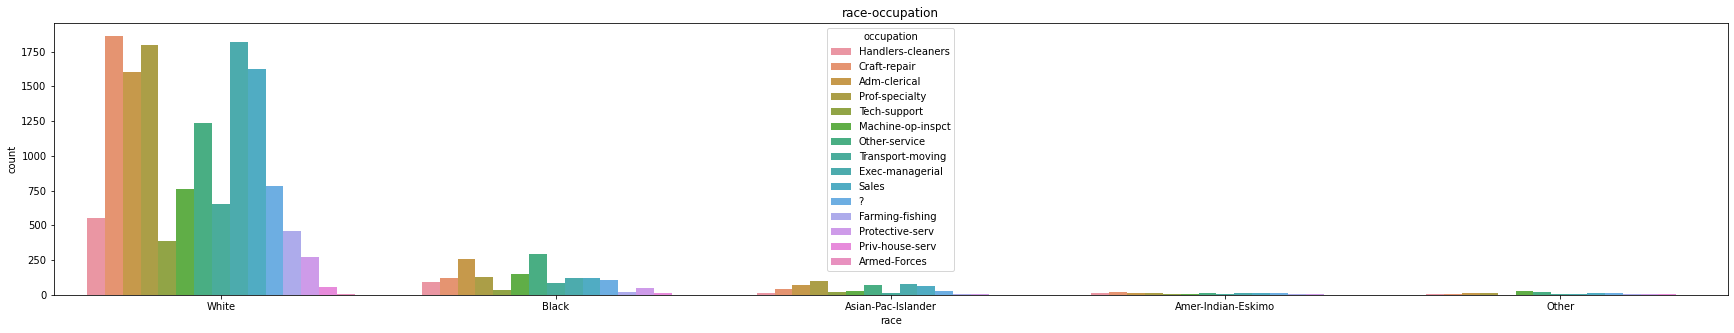

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="race",hue="occupation",data=train)
plt.title("race-occupation")

plt.show()

年齢と職業

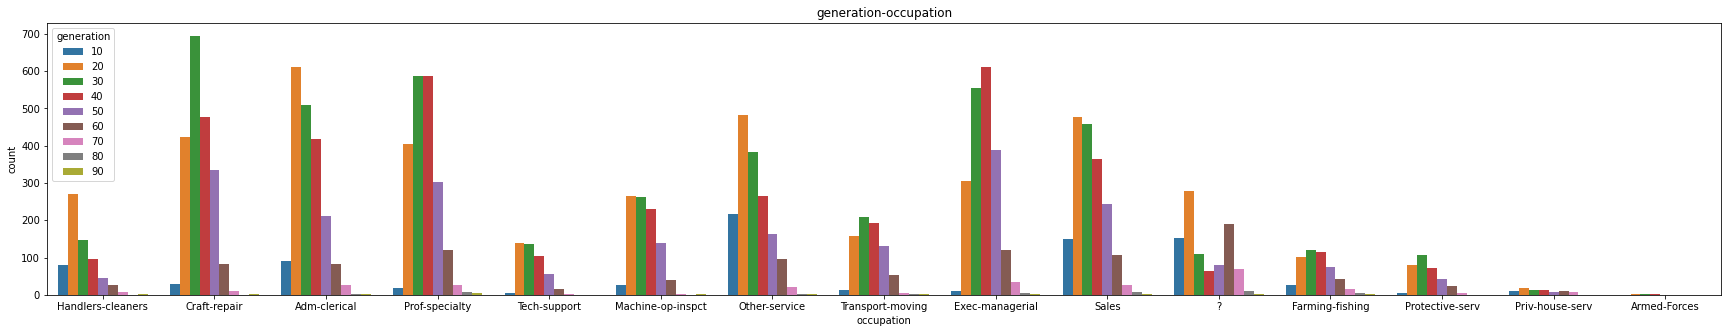

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="occupation",hue="generation",data=train)
plt.title("generation-occupation")

plt.show()

人種とクラス

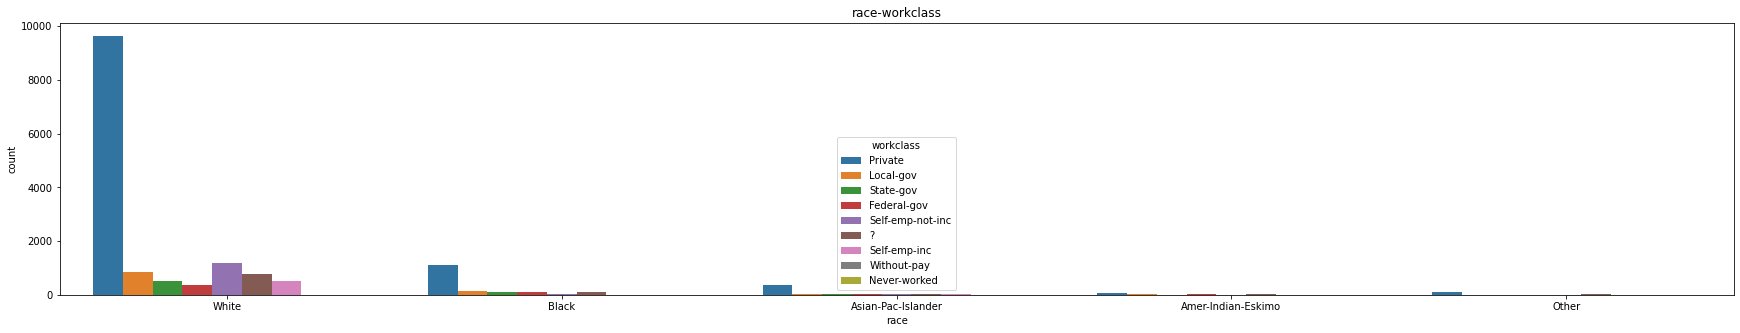

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="race",hue="workclass",data=train)
plt.title("race-workclass")

plt.show()

クラスと職業

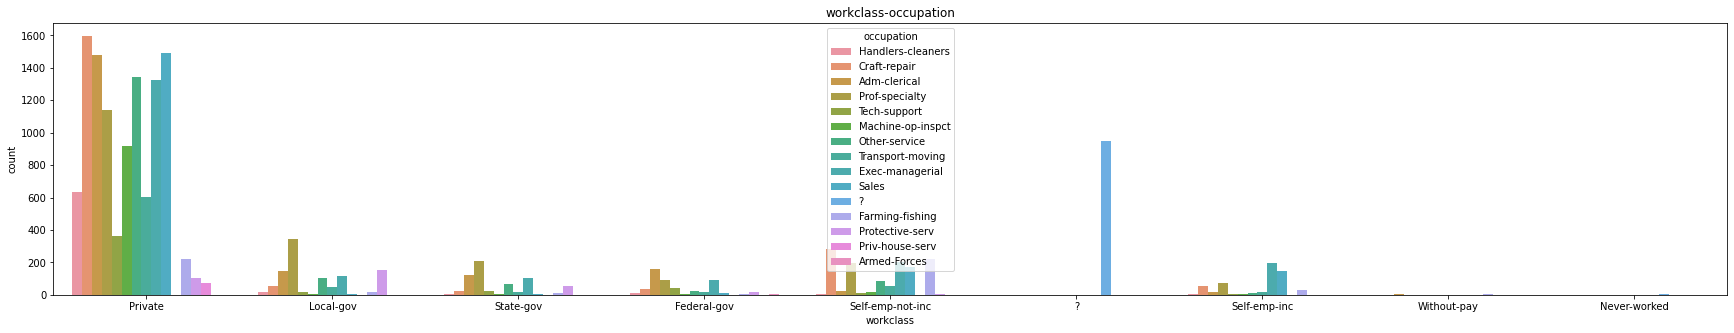

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="workclass",hue="occupation",data=train)
plt.title("workclass-occupation")

plt.show()

配偶者と職業、クラス

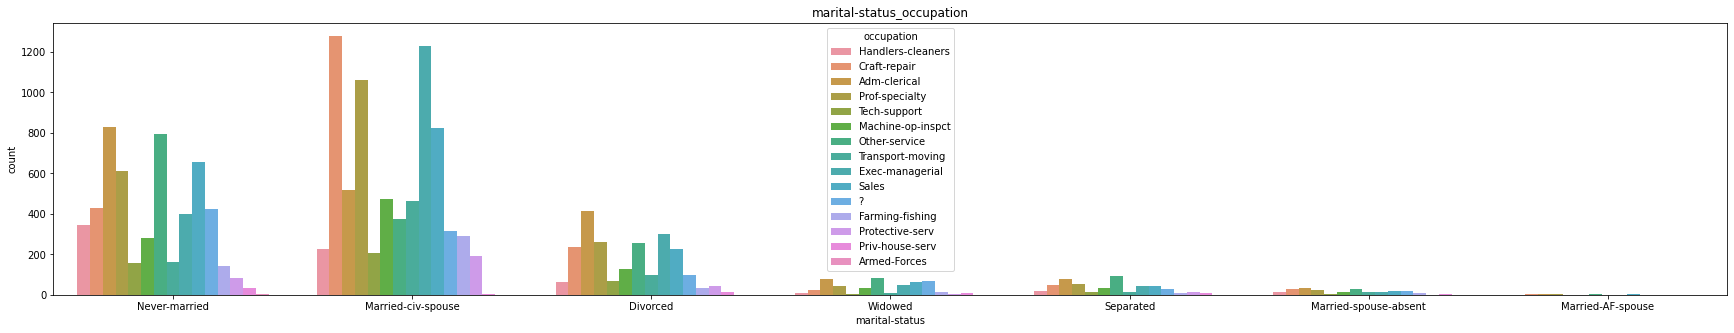

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="marital-status",hue="occupation",data=train)
plt.title("marital-status_occupation")

plt.show()

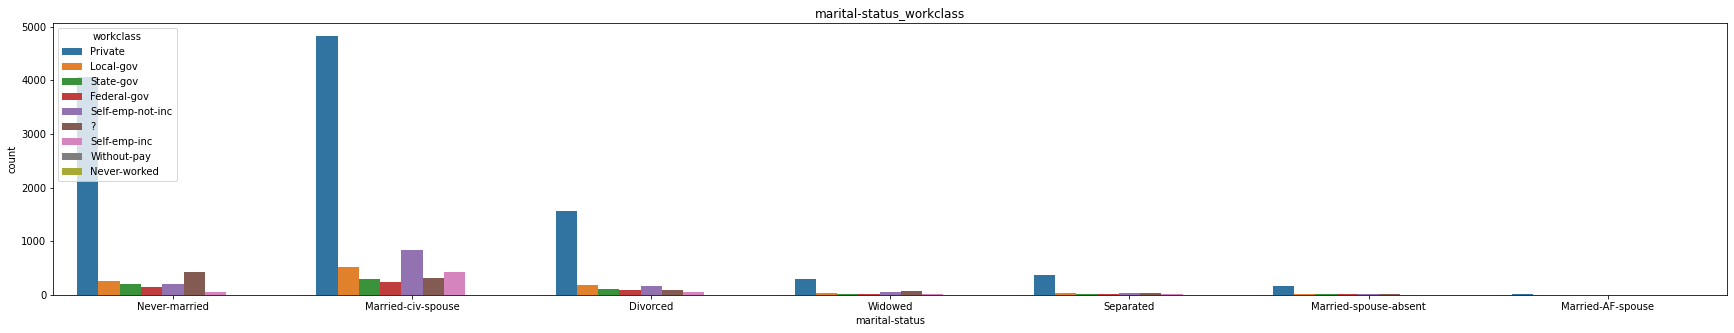

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.countplot(x="marital-status",hue="workclass",data=train)
plt.title("marital-status_workclass")

plt.show()

教育と性別

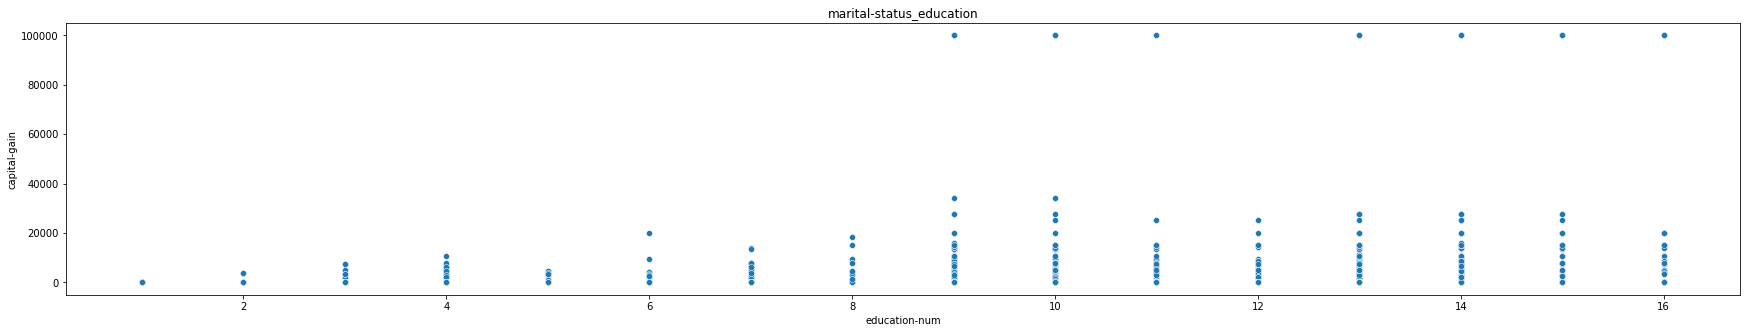

In [ ]:
plt.figure(figsize=(30,5))  # 図の大きさ指定
sns.scatterplot(x="education-num",y="capital-gain",data=train)
plt.title("marital-status_education")

plt.show()

# 特徴量生成

In [ ]:
# train
train["race_country"] = train["race"] + train["native-country"] # 人種と母国
train["race_education"] = train["race"] + train["education"] # 人種と教育
train["ed_occupation"] = train["education"] + train["occupation"] # 教育と職業
train["sex-occupation"] = train["sex"] + train["occupation"] # 性別と職業
train["race-occupation"] = train["race"] + train["occupation"] # 人種と職業
train["race-workclass"] = train["race"] + train["workclass"] # 人種とクラス
train["workclass-occupation"] = train["workclass"] + train["occupation"] # 職業とクラス(クラスを細かく)
train["workclass_native-country"] = train["workclass"] + train["native-country"] # 母国とクラス
train["marital-status_occupation"] = train["occupation"] + train["marital-status"] # 配偶者と職業
train["marital-status_workclass"] = train["workclass"] + train["marital-status"] # 配偶者とクラス
train["marital-status_relationship"] = train["relationship"] + train["marital-status"] # 配偶者の有無と関係
train["ed-num_capital-gain"] = train["education-num"].astype(str) + train["capital-gain"].astype(str) # 教育とキャピタルゲイン

# test
test["race_country"] = test["race"] + test["native-country"] # 人種と母国
test["race_education"] = test["race"] + test["education"] # 人種と教育
test["ed_occupation"] = test["education"] + test["occupation"] # 教育と職業
test["sex-occupation"] = test["sex"] + test["occupation"] # 性別と職業
test["race-occupation"] = test["race"] + test["occupation"] # 人種と職業
test["race-workclass"] = test["race"] + test["workclass"] # 人種とクラス
test["workclass-occupation"] = train["workclass"] + test["occupation"] # 職業とクラス(クラスを細かく)
test["workclass_native-country"] = train["workclass"] + test["native-country"] # 母国とクラス
test["marital-status_occupation"] = train["occupation"] + test["marital-status"] # 配偶者と職業
test["marital-status_workclass"] = test["workclass"] + test["marital-status"] # 配偶者とクラス
test["marital-status_relationship"] = test["relationship"] + test["marital-status"] # 配偶者の有無と関係
test["ed-num_capital-gain"] = test["education-num"].astype(str) + test["capital-gain"].astype(str) # 教育とキャピタルゲイン

In [ ]:
print(train.shape) # Yが含まれる
print(test.shape)

(16280, 27)
(16281, 26)


In [ ]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y,race_country,race_education,ed_occupation,sex-occupation,race-occupation,race-workclass,workclass-occupation,workclass_native-country,marital-status_occupation,marital-status_workclass,marital-status_relationship,ed-num_capital-gain
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K,WhiteUnited-States,White11th,11thHandlers-cleaners,MaleHandlers-cleaners,WhiteHandlers-cleaners,WhitePrivate,PrivateHandlers-cleaners,PrivateUnited-States,Handlers-cleanersNever-married,PrivateNever-married,Own-childNever-married,70
10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K,WhiteUnited-States,WhiteAssoc-acdm,Assoc-acdmCraft-repair,MaleCraft-repair,WhiteCraft-repair,WhitePrivate,PrivateCraft-repair,PrivateUnited-States,Craft-repairMarried-civ-spouse,PrivateMarried-civ-spouse,HusbandMarried-civ-spouse,120
11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K,WhiteUnited-States,WhiteHS-grad,HS-gradAdm-clerical,FemaleAdm-clerical,WhiteAdm-clerical,WhitePrivate,PrivateAdm-clerical,PrivateUnited-States,Adm-clericalMarried-civ-spouse,PrivateMarried-civ-spouse,WifeMarried-civ-spouse,90
13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K,BlackUnited-States,BlackMasters,MastersProf-specialty,FemaleProf-specialty,BlackProf-specialty,BlackLocal-gov,Local-govProf-specialty,Local-govUnited-States,Prof-specialtyDivorced,Local-govDivorced,UnmarriedDivorced,140
14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K,WhiteUnited-States,WhiteAssoc-acdm,Assoc-acdmTech-support,MaleTech-support,WhiteTech-support,WhitePrivate,PrivateTech-support,PrivateUnited-States,Tech-supportMarried-civ-spouse,PrivateMarried-civ-spouse,HusbandMarried-civ-spouse,120


# ラベルエンコード

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [ ]:
train["workclass"] = lbl.fit_transform(train["workclass"])
train["education"] = lbl.fit_transform(train["education"])
train["marital-status"] = lbl.fit_transform(train["marital-status"])
train["occupation"] = lbl.fit_transform(train["occupation"])
train["relationship"] = lbl.fit_transform(train["relationship"])
train["race"] = lbl.fit_transform(train["race"])
train["sex"] = lbl.fit_transform(train["sex"])
train["native-country"] = lbl.fit_transform(train["native-country"])

In [ ]:
train["race_country"] = lbl.fit_transform(train["race_country"])
train["race_education"] = lbl.fit_transform(train["race_education"])
train["ed_occupation"] = lbl.fit_transform(train["ed_occupation"])
train["sex-occupation"] = lbl.fit_transform(train["sex-occupation"])
train["race-occupation"] = lbl.fit_transform(train["race-occupation"])
train["race-workclass"] = lbl.fit_transform(train["race-workclass"])
train["workclass-occupation"] = lbl.fit_transform(train["workclass-occupation"])
train["workclass_native-country"] = lbl.fit_transform(train["workclass_native-country"])
train["marital-status_occupation"] = lbl.fit_transform(train["marital-status_occupation"])
train["marital-status_workclass"] = lbl.fit_transform(train["marital-status_workclass"])
train["marital-status_relationship"] = lbl.fit_transform(train["marital-status_relationship"])
train["ed-num_capital-gain"] = lbl.fit_transform(train["ed-num_capital-gain"])

KeyError: ignored

In [ ]:
test["workclass"] = lbl.fit_transform(test["workclass"])
test["education"] = lbl.fit_transform(test["education"])
test["marital-status"] = lbl.fit_transform(test["marital-status"])
test["occupation"] = lbl.fit_transform(test["occupation"])
test["relationship"] = lbl.fit_transform(test["relationship"])
test["race"] = lbl.fit_transform(test["race"])
test["sex"] = lbl.fit_transform(test["sex"])
test["native-country"] = lbl.fit_transform(test["native-country"])

In [ ]:
test["race_country"] = lbl.fit_transform(test["race_country"])
test["race_education"] = lbl.fit_transform(test["race_education"])
test["ed_occupation"] = lbl.fit_transform(test["ed_occupation"])
test["sex-occupation"] = lbl.fit_transform(test["sex-occupation"])
test["race-occupation"] = lbl.fit_transform(test["race-occupation"])
test["race-workclass"] = lbl.fit_transform(test["race-workclass"])
test["workclass-occupation"] = lbl.fit_transform(test["workclass-occupation"])
test["workclass_native-country"] = lbl.fit_transform(test["workclass_native-country"])
test["marital-status_occupation"] = lbl.fit_transform(test["marital-status_occupation"])
test["marital-status_workclass"] = lbl.fit_transform(test["marital-status_workclass"])
test["marital-status_relationship"] = lbl.fit_transform(test["marital-status_relationship"])
test["ed-num_capital-gain"] = lbl.fit_transform(test["ed-num_capital-gain"])

# 大量ワンホットエンコーディング → うまくいかない

In [ ]:
pd.get_dummies(train, columns=["workclass","education", "marital-status", "occupation", "relationship", "race", "sex", "race_country", "race_education", "ed_occupation", "sex-occupation", "race-occupation", "race-workclass", "workclass-occupation", "workclass_native-country", "marital-status_occupation", "marital-status_workclass", "native-country", "marital-status_relationship", "ed-num_capital-gain"], sparse=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Y,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,...,ed-num_capital-gain_93103,ed-num_capital-gain_93137,ed-num_capital-gain_93325,ed-num_capital-gain_934095,ed-num_capital-gain_93411,ed-num_capital-gain_93432,ed-num_capital-gain_93464,ed-num_capital-gain_93471,ed-num_capital-gain_93674,ed-num_capital-gain_93781,ed-num_capital-gain_93818,ed-num_capital-gain_93887,ed-num_capital-gain_93908,ed-num_capital-gain_93942,ed-num_capital-gain_94064,ed-num_capital-gain_94101,ed-num_capital-gain_94386,ed-num_capital-gain_94416,ed-num_capital-gain_94650,ed-num_capital-gain_94787,ed-num_capital-gain_94865,ed-num_capital-gain_94934,ed-num_capital-gain_95013,ed-num_capital-gain_95178,ed-num_capital-gain_95455,ed-num_capital-gain_95721,ed-num_capital-gain_9594,ed-num_capital-gain_96360,ed-num_capital-gain_96418,ed-num_capital-gain_96767,ed-num_capital-gain_96849,ed-num_capital-gain_97298,ed-num_capital-gain_97443,ed-num_capital-gain_97688,ed-num_capital-gain_98614,ed-num_capital-gain_9914,ed-num_capital-gain_99386,ed-num_capital-gain_99562,ed-num_capital-gain_9991,ed-num_capital-gain_999999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,90,313986,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,46,74895,12,0,1485,55,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,37,67433,9,0,0,40,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,45,144940,14,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,40,272960,12,0,0,42,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,42,83411,10,0,1408,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32553,59,223131,9,0,0,60,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32554,42,142424,11,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.get_dummies(test, columns=["workclass","education", "marital-status", "occupation", "relationship", "race", "sex", "race_country", "race_education", "ed_occupation", "sex-occupation", "race-occupation", "race-workclass", "workclass-occupation", "workclass_native-country", "marital-status_occupation", "marital-status_workclass", "native-country", "marital-status_relationship", "ed-num_capital-gain"], sparse=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,...,ed-num_capital-gain_93273,ed-num_capital-gain_93325,ed-num_capital-gain_934095,ed-num_capital-gain_93411,ed-num_capital-gain_93432,ed-num_capital-gain_93456,ed-num_capital-gain_93464,ed-num_capital-gain_93471,ed-num_capital-gain_93674,ed-num_capital-gain_93781,ed-num_capital-gain_93818,ed-num_capital-gain_93887,ed-num_capital-gain_93908,ed-num_capital-gain_93942,ed-num_capital-gain_9401,ed-num_capital-gain_94064,ed-num_capital-gain_94101,ed-num_capital-gain_94386,ed-num_capital-gain_94416,ed-num_capital-gain_94508,ed-num_capital-gain_94650,ed-num_capital-gain_94687,ed-num_capital-gain_94787,ed-num_capital-gain_94865,ed-num_capital-gain_95013,ed-num_capital-gain_95178,ed-num_capital-gain_95455,ed-num_capital-gain_95721,ed-num_capital-gain_9594,ed-num_capital-gain_96418,ed-num_capital-gain_96497,ed-num_capital-gain_96767,ed-num_capital-gain_96849,ed-num_capital-gain_97298,ed-num_capital-gain_97443,ed-num_capital-gain_97688,ed-num_capital-gain_98614,ed-num_capital-gain_9914,ed-num_capital-gain_99386,ed-num_capital-gain_999999
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30,107793,10,0,0,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,39,76767,10,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,28,149324,10,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50,276241,13,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,53,177647,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,59,372020,13,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32556,21,154422,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32558,59,175689,10,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 初期値ワンホット → うまくいかない

In [ ]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
id,,,,,,,,,,,,,,,
5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K


In [ ]:
pd.get_dummies(train, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], sparse=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Y,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,...,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,90,313986,7,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,46,74895,12,0,1485,55,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
11,37,67433,9,0,0,40,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
13,45,144940,14,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14,40,272960,12,0,0,42,>50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,42,83411,10,0,1408,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32553,59,223131,9,0,0,60,<=50K,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32554,42,142424,11,0,0,40,<=50K,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
pd.get_dummies(test, columns=["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex", "native-country"], sparse=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,30,107793,10,0,0,56,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,39,76767,10,0,0,60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,28,149324,10,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,50,276241,13,0,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,53,177647,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,59,372020,13,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32556,21,154422,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,59,175689,10,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# x-train と y_train 分割

In [ ]:
x_train = train.drop("Y", axis=1)
y_train = train["Y"]

# ヒートマップ

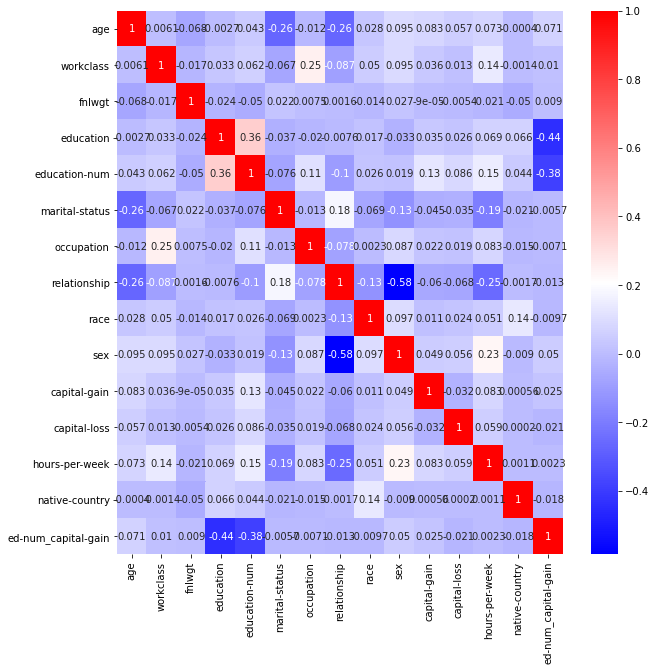

In [ ]:
# 実際の値を一緒に描いたり、カラーマップを変更すると見やすい

# annotで数値を、cmapでカラーの変更
plt.figure(figsize=(10,10)) 
sns.heatmap(data=x_train.corr(), annot=True, cmap='bwr')

# 新カラムの作成

# クロスバリデーション

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

FOLD = 5
NUM_ROUND = 100
VERBOSE_EVAL = -1

valid_scores = []
models = []
kf = KFold(n_splits=FOLD, shuffle=True, random_state=42)

for fold, (train_indices, valid_indices) in enumerate(kf.split(x)):
    x_train, x_valid = x[train_indices], x[valid_indices]
    y_train, y_valid = y[train_indices], y[valid_indices]
    lgb_train = lgb.Dataset(x_train, y_train)
    lgb_eval = lgb.Dataset(x_valid, y_valid)

    model = lgb.train(
        params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=NUM_ROUND,
        verbose_eval=VERBOSE_EVAL
    )

    y_valid_pred = model.predict(x_valid)

# ランダムフォレストやってみた

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_test = clf.predict(test)

In [ ]:
submission = pd.DataFrame([test.index, y_test]).T

submission.to_csv('normal_random.csv', header=None, index=None)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['importance'])
display(importance)

,importance
age,516
workclass,144
fnlwgt,455
education,136
education-num,215
marital-status,132
occupation,261
relationship,117
race,43
sex,49


# lightGBM (初期値)

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier()

In [ ]:
x_train = x_train.drop(["race", "sex"], axis=1)
test = test.drop(["race", "sex"], axis=1)

In [ ]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_test = model.predict(test)

In [ ]:
submission = pd.DataFrame([test.index, y_test]).T

submission.to_csv('normal_cluster.csv', header=None, index=None)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['importance'])
display(importance)

,importance
age,504
workclass,130
fnlwgt,446
education,141
education-num,225
marital-status,117
occupation,293
relationship,113
race,52
sex,49


# 特徴量重要度からカラムを削除

In [ ]:
# sex, race, education, native_country, race_country を除いて予測

In [ ]:
x_train_drop = x_train.drop(["workclass", "sex", "race", "education", "race_country"] ,axis=1)
test_drop = test.drop(["workclass", "sex", "race", "education", "race_country"] ,axis=1)

In [ ]:
model.fit(x_train_drop, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_test_drop = model.predict(test_drop)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train_drop.columns, columns=['importance'])
display(importance)

,importance
age,426
fnlwgt,342
education-num,160
marital-status,99
occupation,86
relationship,57
capital-gain,293
capital-loss,204
hours-per-week,253
native-country,65


# 相関強い2つのうち、重要度低いものを削除

In [ ]:
# occupation, race_education, marital-status_relationship, marital-status_workclass

x_train_drop_ = x_train_drop.drop(["occupation", "race_education", "marital-status_relationship", "marital-status_workclass"] ,axis=1)
test_drop_ = test_drop.drop(["occupation", "race_education", "marital-status_relationship", "marital-status_workclass"] ,axis=1)

In [ ]:
model.fit(x_train_drop_, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_test_drop_ = model.predict(test_drop_)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train_drop_.columns, columns=['importance'])
display(importance)

,importance
age,456
fnlwgt,384
education-num,168
marital-status,105
relationship,96
capital-gain,286
capital-loss,214
hours-per-week,247
native-country,55
ed_occupation,189


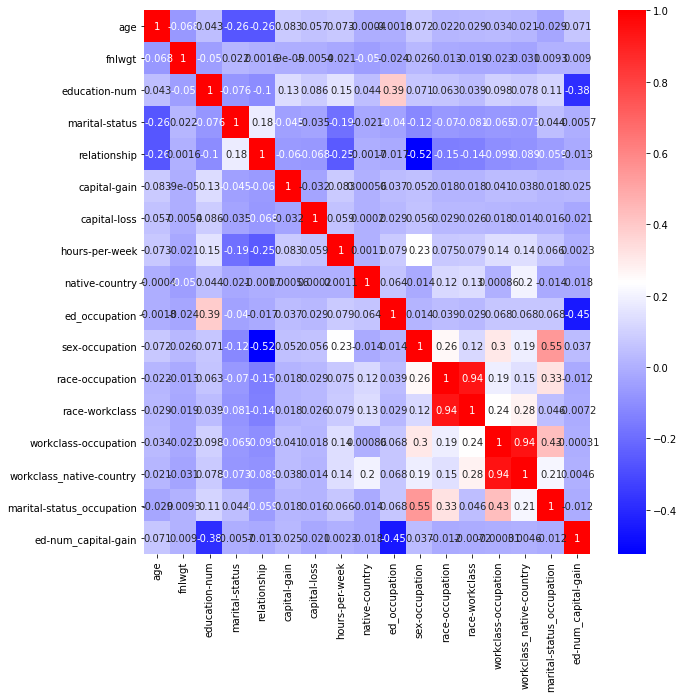

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(data=x_train_drop_.corr(), annot=True, cmap='bwr')

In [ ]:
submission = pd.DataFrame([test.index, y_test_drop_]).T

submission.to_csv('gbm_drop_many-importance.csv', header=None, index=None)

# クラスタリング 

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 後工程でデータを分けるために判別できるように新たな列を作成
x_train["tmp"] = "x_train"
test["tmp"] = "test"

# 変数を生成するために一時的にx_trainとtestを結合
conb = pd.concat([x_train, test])

# データ処理のためにpandasからnp.arrayに変換
conb_array = np.array(conb[conb.columns[1]].tolist())  # .tolist() : リスト化  # columns[1] : workclass


for i in range(len(conb.columns)):  # len(conb.columns) → 14
    if i <= 1:
        continue
    if conb.columns[i]=="tmp":
        continue
    conb_array = np.vstack((conb_array,conb[conb.columns[i]]))  # columns[1] : workclass に 追加していく
conb_array = conb_array.T  # 転置

# クラスタリングを行います。
# 変数 cluster_point は分類するクラスタの数を指定します。
# 2以上の任意の整数を指定してください。
cluster_point = 6
pred = KMeans(n_clusters=cluster_point).fit_predict(conb_array)
conb["cluster"] = pred

# trainとtestに再分割
x_train["cluster"] = conb[conb["tmp"]=="x_train"]["cluster"]
test["cluster"] = conb[conb["tmp"]=="test"]["cluster"]
x_train.drop("tmp",axis=1,inplace=True)
test.drop("tmp",axis=1,inplace=True)

In [ ]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_test_cluster = model.predict(test)

In [ ]:
submission = pd.DataFrame([test.index, y_test_cluster]).T

submission.to_csv('gbm_nensyu_cluster.csv', header=None, index=None)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['importance'])
display(importance)

,importance
age,505
workclass,132
fnlwgt,431
education,138
education-num,242
marital-status,133
occupation,240
relationship,126
race,60
sex,46


# パラメータの調整

LightGBMの引数

【objective】回帰：regression, 二値分類：binary, 多値分類：multiclass

【learning_rate】学習率(0.01)

【num_iterations】木の数(100)

【num_leaves】木にある分岐の個数(31)

【max_depth】深さ(-1)

【verbosity】学習途中の中継的な情報を表示するかしないか(-1にすると非表示)

In [ ]:
model_params = lgb.LGBMClassifier(objective='binary')

In [ ]:
model_params.fit(x_train, y_train)

ValueError: ignored

In [ ]:
y_test_params = model_params.predict(test)

In [ ]:
submission = pd.DataFrame([test.index, y_test_params]).T

submission.to_csv('gbm_nensyu_params.csv', header=None, index=None)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 後工程でデータを分けるために判別できるように新たな列を作成
x_train["tmp"] = "x_train"
test["tmp"] = "test"

# 変数を生成するために一時的にx_trainとtestを結合
conb = pd.concat([x_train, test])

# データ処理のためにpandasからnp.arrayに変換
conb_array = np.array(conb[conb.columns[1]].tolist())  # .tolist() : リスト化  # columns[1] : workclass


for i in range(len(conb.columns)):  # len(conb.columns) → 14
    if i <= 1:
        continue
    if conb.columns[i]=="tmp":
        continue
    conb_array = np.vstack((conb_array,conb[conb.columns[i]]))  # columns[1] : workclass に 追加していく
conb_array = conb_array.T  # 転置

# クラスタリングを行います。
# 変数 cluster_point は分類するクラスタの数を指定します。
# 2以上の任意の整数を指定してください。
cluster_point = 4
pred = KMeans(n_clusters=cluster_point).fit_predict(conb_array)
conb["cluster"] = pred

# trainとtestに再分割
x_train["cluster"] = conb[conb["tmp"]=="x_train"]["cluster"]
test["cluster"] = conb[conb["tmp"]=="test"]["cluster"]
x_train.drop("tmp",axis=1,inplace=True)
test.drop("tmp",axis=1,inplace=True)

NameError: ignored

# 特徴量追加

# 予測

特徴量の重要度知った　→　・どう繋げるか

・クロスバリデーション

・入力変数の追加

・ハイパーパラメータを調整

・モデルの変更

In [ ]:
# sex, clusterを除いて予測

In [ ]:
x_train_ = x_train.drop(["sex", "tmp"], axis=1)
test_ = test.drop(["sex", "tmp"], axis=1)

In [ ]:
model.fit(x_train_, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_test_ = model.predict(test_)

In [ ]:
submission = pd.DataFrame([test.index, y_test_]).T

submission.to_csv('gbm_nensyu_importance_sex.csv', header=None, index=None)

In [ ]:
model.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
submission = pd.DataFrame([test.index, y_test_cluster]).T

submission.to_csv('gbm_nensyu_cluster.csv', header=None, index=None)

In [ ]:
importance = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=['importance'])
display(importance)

,importance
age,505
workclass,132
fnlwgt,431
education,138
education-num,242
marital-status,133
occupation,240
relationship,126
race,60
sex,46


# 正解率の確認